## Big Mart Sales

## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


## About the DataSet :
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

|Features|Description|
|-----|-----|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted.|
|source|is it a train data or test data point|

 

### Load the data

Just to inform you guys that this data is preprocessed with necessary missing value imputation and feature engineering and encoding of features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

sales_data = pd.read_csv('sales.csv',index_col=False)

sales_data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,source,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,train,14,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,train,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,train,14,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,train,15,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,train,26,0,...,0,1,0,0,0,0,0,0,0,0


### Data preparation 

In [2]:
#Drop the columns which have been converted to different types:
sales_data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Drop unnecessary columns:
sales_data.drop(['source'],axis=1,inplace=True)

In [3]:
sales_data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,4,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,15,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### Lets try to plot and predict the model by using polynomial features with degree 15?
**Note: The polynomial model takes time to run with all the records, take a subset of rows.**

In [4]:
X = sales_data.iloc[:200, 4:5].values # Item_Visibility feature
y = sales_data.iloc[:200, 2].values 
from sklearn.preprocessing import PolynomialFeatures 
 
poly = PolynomialFeatures(degree = 15) 
#X = df.drop(['Item_Outlet_Sales'],1)
#y = df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 12) 

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
#y_test = poly.fit_transform(y_test)
from sklearn.linear_model import LinearRegression   
#poly.fit(X_poly, y_train)
lin2 = LinearRegression() 
lin2.fit(X_train_poly,y_train)
poly_pred = lin2.predict(X_test_poly)

In [5]:
dfff = pd.DataFrame(X_test,poly_pred).reset_index().sort_values(by='index')

In [6]:
poly_pred = lin2.predict(X_test_poly)
result = pd.DataFrame({'actual': y_test , 'predicted': poly_pred})
result = result.reset_index().drop(['index'] , 1)
result.head()

,actual,predicted
0,214.3876,2941.023777
1,239.6880,1956.873500
2,1360.2294,1795.382400
3,4064.0432,2032.543786
4,147.8076,2941.023777


In [7]:
dfff[0]

22    20.600
23    20.500
26    12.150
12    12.150
14    12.150
55    12.800
2     11.800
17    11.800
13    13.000
11    13.100
20    11.350
18    11.300
36    11.100
40    13.350
51    13.350
59    10.500
39    10.395
47    13.500
25    10.195
1     10.000
41    10.000
42     9.800
44     9.800
28     9.395
15     9.300
58     9.000
32    13.650
3      8.315
6      7.970
10     7.930
37     7.905
49    13.850
57     7.235
48     7.235
29    18.250
56    17.850
45    17.700
34     6.525
35    18.500
5     18.500
54     6.420
30    14.500
27     6.305
16    18.600
52     6.215
24     6.195
8      6.155
7     18.700
38     5.920
31     5.750
9     19.000
46    15.100
21    15.200
53    19.250
33    19.700
19    15.500
4     15.500
0     15.500
43    16.350
50    16.200
Name: 0, dtype: float64

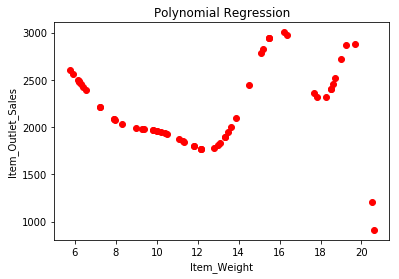

In [8]:
# Visualising the Polynomial Regression results 
#plt.scatter(X_test, y_test, color = 'blue') 
plt.scatter(X_test, lin2.predict(poly.fit_transform(X_test)), color = 'red') 
# plt.plot(dfff['index'], dfff[0], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Item_Weight') 
plt.ylabel('Item_Outlet_Sales') 
  
plt.show() 

In [9]:
X = sales_data.iloc[:200, 4:5].values # Item_Visibility feature
y = sales_data.iloc[:200, 2].values 
#X = StandardScaler().fit_transform(X)
X = np.sort(X, axis=0)

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 15) 
X_poly = poly.fit_transform(X) 
#poly.fit(X_poly, y) 
from sklearn.linear_model import LinearRegression   
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

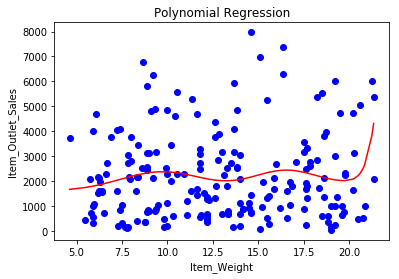

In [10]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Item_Weight') 
plt.ylabel('Item_Outlet_Sales') 
  
plt.show() 

### Advantages of using Polynomial Regression:
```python
* Broad range of function can be fit under it.
* Polynomial basically fits wide range of curvature.
* Polynomial provides the best approximation of the relationship between dependent and independent variable.
```
### Disadvantages of using Polynomial Regression
```python
* These are too sensitive to the outliers.
* The presence of one or two outliers in the data can seriously affect the results of a nonlinear analysis.
* In addition there are unfortunately fewer model validation tools for the detection of outliers in 
  nonlinear regression than there are for linear regression.
```

### Create a baseline regression model and observe the error measured.

In [ ]:
df = sales_data.drop(['Item_Identifier'],axis = 1)
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
X = df.drop(['Item_Outlet_Sales'],1)
y = df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 12) 
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

### What will happen to R-Square score if you increase the no. of predictors in your model.Use all features for prediction and implement a linear regression model

In [ ]:
df = sales_data.drop(['Item_Identifier'],axis = 1)
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
X = df.drop(['Item_Outlet_Sales'],1)
y = df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 12) 
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

### Does your model faces the issue of Heteroskedacity. How to detect it ?

In [ ]:
residual = y_test-y_pred
sns.distplot(residual)


### Let's have a look at the model coefficients of our model 

In [ ]:
lr.coef_

In [ ]:
sns.pairplot(sales_data)

In [ ]:
numerical = ['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9']
for i in range(0,len(numerical),2):
    if len(numerical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.scatter(df[numerical[i]],df["Item_Outlet_Sales"])
        plt.title('Plotting target against '+numerical[i])
        plt.xlabel(numerical[i])
        plt.ylabel("Item_Outlet_Sales")
        plt.subplot(122)
        plt.scatter(df[numerical[i+1]],df["Item_Outlet_Sales"])
        plt.title('Plotting target against '+numerical[i+1])
        plt.xlabel(numerical[i+1])
        plt.ylabel("Item_Outlet_Sales")
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(df[numerical[i]],dataframe["Item_Outlet_Sales"])

### How will you deal with non-linearity in your model ?

Hint : Lasso, Ridge and Elastic net regularization might be of some help.

**RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
X = df.drop(['Item_Outlet_Sales',],1)
y = df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 115424) 
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
r2 = r2_score(y_test,ridge_pred)
r2

### Implementing Lasso regression and understanding the differences between the two

In [ ]:
from sklearn.linear_model import Lasso
X = df.drop(['Item_Outlet_Sales',],1)
y = df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 12) 
lasso = Lasso(alpha = 1)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
r2 = r2_score(y_test,lasso_pred)
r2

In [ ]:
lasso.coef_

### What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

Hint: Take a look at the concept cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.linear_model import Ridge
ridge = Ridge()
#kfold = model_selection.KFold(n_splits=10, random_state=12)
#print((np.mean(cross_val_score(ridge,X,y,cv = kfold)))*100, '%')
    print((np.mean(cross_val_score(ridge,X,y,cv = 10)))*100, '%')


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')


ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# Code starts here

# instantiate lasso and ridge models
lasso_model = Lasso()
ridge_model = Ridge()
ridge_grid = GridSearchCV(estimator = ridge_model,param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train,y_train)
lasso_grid = GridSearchCV(estimator = lasso_model,param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train,y_train)
lasso_pred1 = lasso_grid.predict(X_test)
ridge_pred1 = ridge_grid.predict(X_test)


In [ ]:
lasso_grid.best_estimator_

In [ ]:
ridge_grid.best_estimator_

In [ ]:
r2_score(y_test,lasso_pred1)

In [ ]:
r2_score(y_test,lasso_pred)

In [ ]:
r2_score(y_test,ridge_pred1)

In [ ]:
r2_score(y_test,ridge_pred)